In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import warnings
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
username = 'peteryasser80'
api_key = 'HrCJvTSZKIraLXWlmHfF'
tls.set_credentials_file(username=username,api_key=api_key)

# - Defining color palette and color maps:

In [3]:
colors = ["#157dd9", "#302c3e", "#f6f6f6"]
cmap = LinearSegmentedColormap.from_list('cmap', colors, N=22)


def sub_cmap(cmap, vmin, vmax):
    return lambda v: cmap(vmin + (vmax - vmin) * v)


cmap1 = sub_cmap(cmap, 0.5, 5)
cmap2 = sub_cmap(cmap, 5, 10)

# Problem statment

 # Brain Stroke
 happens when there is a blockage in the blood circulation in the brain or when a blood vessel in the brain breaks and leaks. The burst or blockage prevents blood and oxygen reaching the brain tissue. Without oxygen the tissues and cells in the brain are damaged and die in no time leading to many symptoms.

Once brain cells die, they generally do not regenerate and devastating damage may occur, sometimes resulting in physical, cognitive and mental disabilities. It is crucial that proper blood flow and oxygen be restored to the brain as soon as possible.

Worldwide, brain stroke is the second leading cause of death and third leading cause of disability. In some cases, the warning signs of a stroke can be obvious but what’s going on inside the body is incredibly complex. 80% of strokes are preventable. But once you’ve had a stroke, the chances you have another one are greater.

# - Data description:

Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# - Importing and exploring data:

In [4]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df=df.drop(["id"],axis=1)

In [7]:
data=df.copy()
hyperDic={1:'has hypertension',0:'has\'t hypertension'}
data['hypertension']=data.stroke.map(hyperDic)

heartDic={1:'has heart disease',0:'has\'t heart disease'}
data['heart_disease']=data.stroke.map(heartDic)

strokeDic={1:'has stroke',0:'has\'t stroke'}
data['stroke']=data.stroke.map(strokeDic)

bins = [0, 20, 40,  60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '80+']
data['agerange'] = pd.cut(data.age, bins, labels = labels,include_lowest = True)

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agerange
0,Male,67.0,has hypertension,has heart disease,Yes,Private,Urban,228.69,36.6,formerly smoked,has stroke,61-80
1,Female,61.0,has hypertension,has heart disease,Yes,Self-employed,Rural,202.21,NaN,never smoked,has stroke,61-80
2,Male,80.0,has hypertension,has heart disease,Yes,Private,Rural,105.92,32.5,never smoked,has stroke,61-80
3,Female,49.0,has hypertension,has heart disease,Yes,Private,Urban,171.23,34.4,smokes,has stroke,41-60
4,Female,79.0,has hypertension,has heart disease,Yes,Self-employed,Rural,174.12,24.0,never smoked,has stroke,61-80
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,has't hypertension,has't heart disease,Yes,Private,Urban,83.75,NaN,never smoked,has't stroke,61-80
5106,Female,81.0,has't hypertension,has't heart disease,Yes,Self-employed,Urban,125.20,40.0,never smoked,has't stroke,80+
5107,Female,35.0,has't hypertension,has't heart disease,Yes,Self-employed,Rural,82.99,30.6,never smoked,has't stroke,21-40
5108,Male,51.0,has't hypertension,has't heart disease,Yes,Private,Rural,166.29,25.6,formerly smoked,has't stroke,41-60


Text(0.5, 1.0, 'stroke')

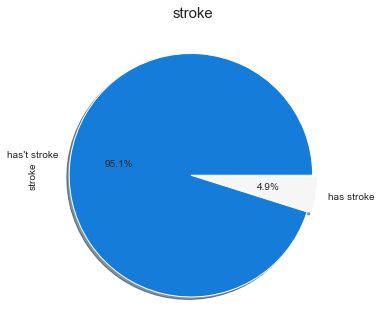

In [8]:
plt.subplot(1, 2, 2)
round(data['stroke'].value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap=cmap, explode=[0.02,0.02],shadow=True)
plt.title('stroke', fontsize=15)


In [9]:
def visualize(c):
    x=[0.02 for i in range(len(list(data[c].unique())))]
    plt.subplot(1, 2, 1)
    plt.title(f'{c} and stroke', fontsize=15)
    sns.countplot(x=c,hue='stroke', data=data, palette=colors)

    plt.subplot(1, 2, 2)
    round(data[c].value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap=cmap, explode=x,shadow=True)
    plt.title(c, fontsize=15)

    plt.show()

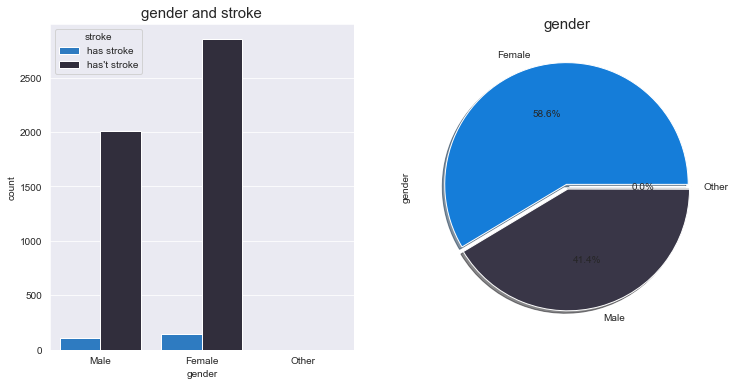

In [10]:
visualize('gender')

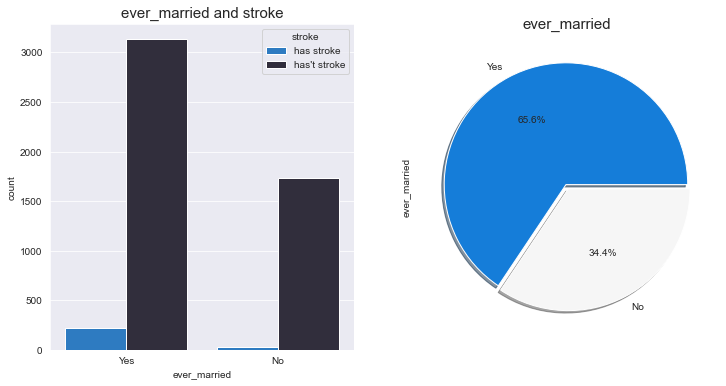

In [11]:
visualize('ever_married')

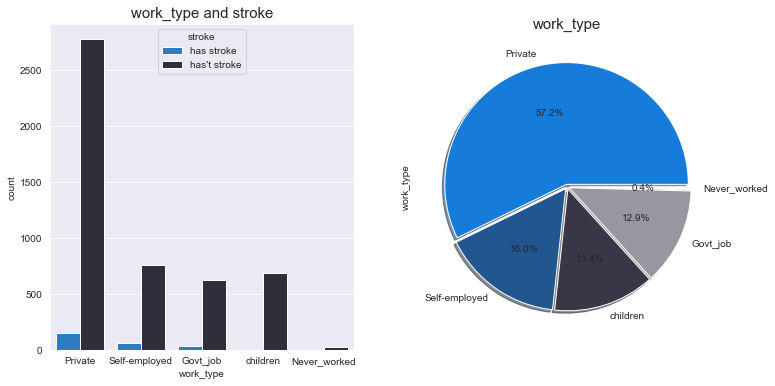

In [12]:
visualize('work_type')

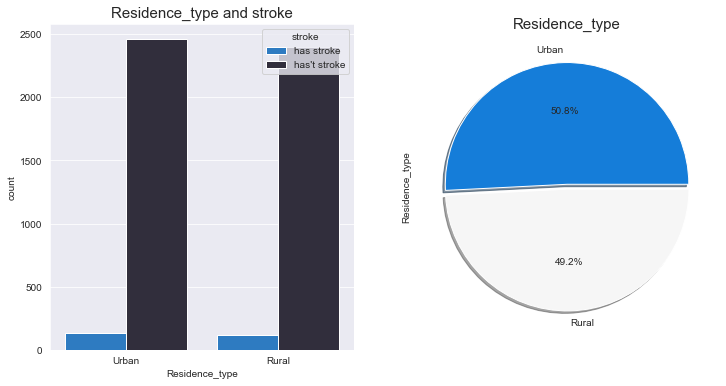

In [13]:
visualize('Residence_type')

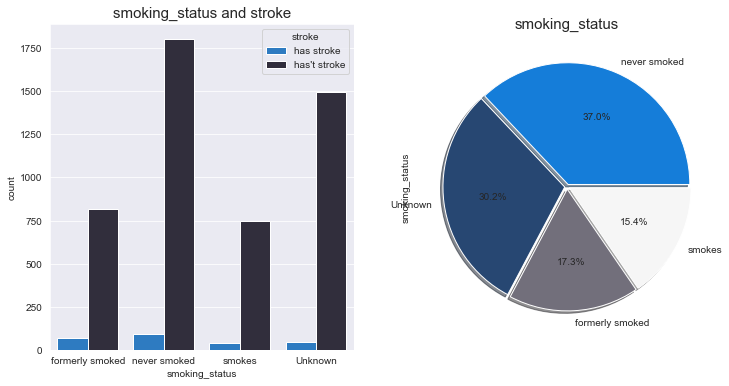

In [14]:
visualize("smoking_status")

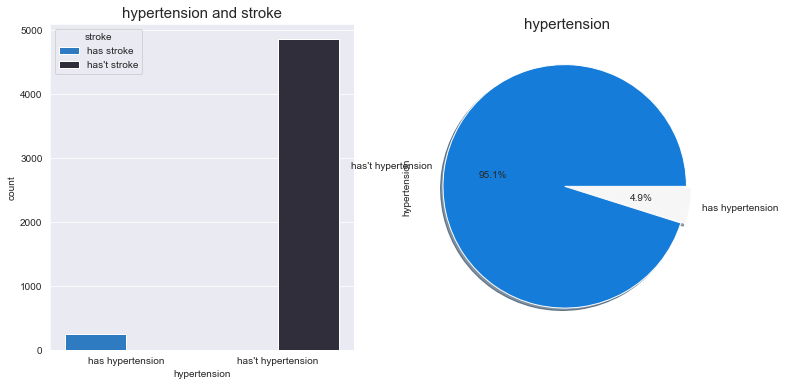

In [15]:
visualize("hypertension")

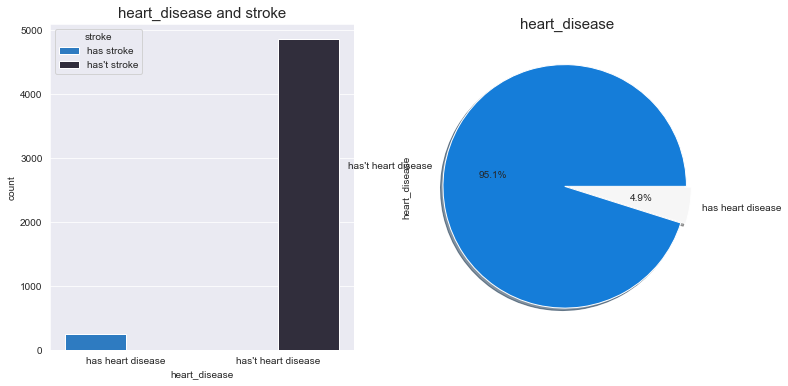

In [16]:
visualize("heart_disease")

(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

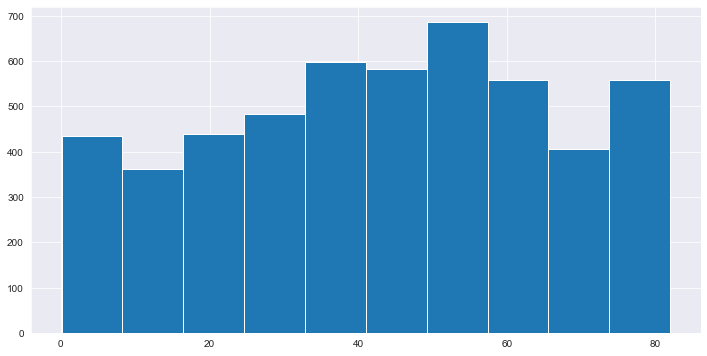

In [17]:
plt.hist(x=data['age'],bins=10)

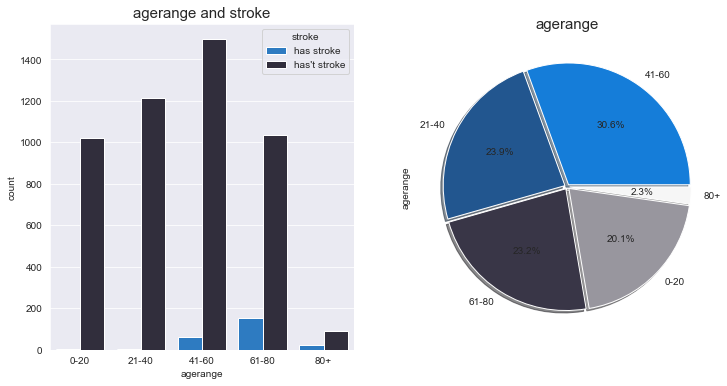

In [18]:
visualize("agerange")

In [31]:
dd = px.data.tips()
d=data.sort_values('agerange')
fig = px.histogram(dd, x=d['agerange'], color=data['gender'])
py.plot(fig,filename='SCI1',auto_open=True)
fig.show()

In [20]:
fig = px.sunburst(data, path=['stroke', 'agerange', 'gender'])
py.plot(fig,filename='SCI2',auto_open=True)
fig.show()

(array([ 411., 1964., 1809.,  575.,  105.,   37.,    4.,    2.,    0.,
           2.]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

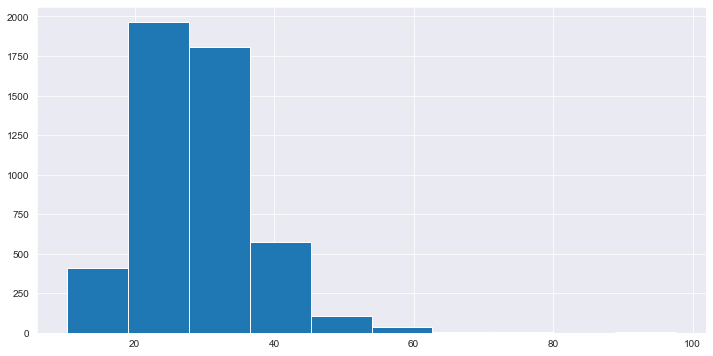

In [21]:
plt.hist(x=data['bmi'],bins=10)

In [22]:
dd = px.data.tips()
fig = px.histogram(dd, x=data['bmi'], color=data['stroke'])
fig.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
   if df[col].dtype=='object':
       l_en=LabelEncoder()
       df[col] = l_en.fit_transform(df[col])

In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [40]:
dd = px.data.tips()
fig = px.histogram(dd, x=data['avg_glucose_level'], color=data['stroke'])
py.plot(fig,filename='SCI5',auto_open=True)
fig.show()

In [26]:
dd = px.data.tips()
fig = px.histogram(dd, x=data['avg_glucose_level'], color=data['gender'])
fig.show()

In [27]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
fig = px.sunburst(data, path=['stroke', 'Residence_type'])
py.plot(fig,filename='SCI3',auto_open=True)
fig.show()

In [39]:
fig = px.sunburst(data, path=['hypertension','stroke'])
py.plot(fig,filename='SCI4',auto_open=True)
fig.show()

<AxesSubplot:>

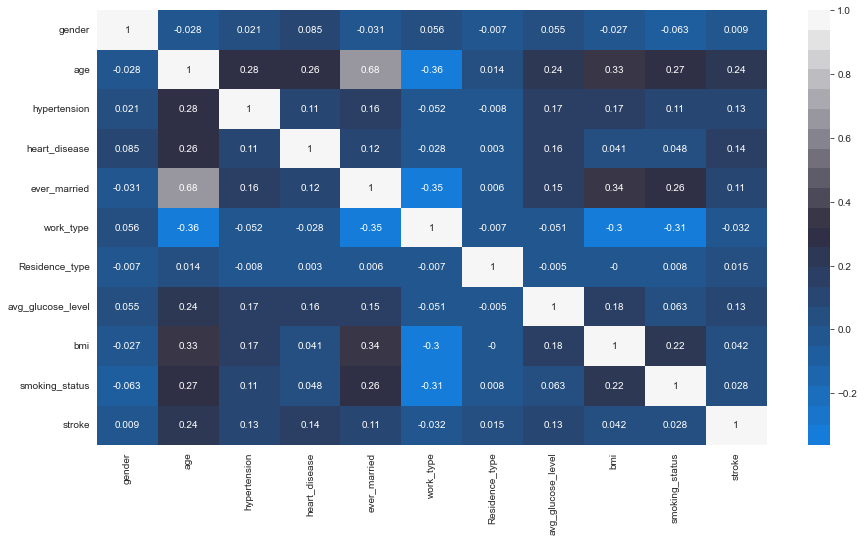

In [30]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(df.corr(), 3), annot=True, cmap=cmap, )